# Prueba Técnica: Análisis de Datos de Transporte Público en España

Dado el conjunto de datos sobre el transporte público en España, realiza un análisis exhaustivo con el objetivo de identificar áreas de mejora en la eficiencia del transporte y reducir los retrasos. El dataset incluye información sobre los viajes realizados, como la fecha, la ruta, el número de pasajeros, la duración del viaje, los retrasos, el tipo de transporte y la región.

## Objetivos
- Realizar un Análisis Exploratorio de Datos (EDA)
- Transformación de Datos
- Análisis para Mejorar la Eficiencia del Transporte
- Diseñar una Base de Datos en SQL e Insertar los Datos usando Python
- Crear un Dashboard que incluya las principales conclusiones extraídas de tu análisis. Puedes usar Tableau o Power BI.

## Requisitos
Proporcionar la solución en un Jupyter Notebook que incluya:
- Los razonamientos y decisiones tomadas durante el análisis.
- El código Python utilizado para la transformación y análisis de los datos.
- La creación e inserción de la base de datos en SQL.
- Las visualizaciones y conclusiones obtenidas.


# Análisis Exploratorio de Datos
### 1. Análisis inicial. 
Comenzaremos por la observación y carga del set de datos.  

 **1.1 Carga de librerías** que utilizaremos en el script de Python :

In [1]:
# Cargamos las librerías
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tabulate import tabulate
import plotly.express as px
import numpy as np
from sqlalchemy import create_engine, text
import statsmodels.api as sm
from statsmodels.formula.api import ols
%run ./Notebook/Functions.ipynb

**1.2 Configuración** de la ruta del fichero y **carga de su contenido** en un DataFrame de Pandas.

In [2]:
# Configuramos la lectura de la fuente datos
RutaFichero="./Data/"
Fichero="Transporte_Publico_Espana.csv"

# Cargamos el set de datos en un DataFrame de Pandas
data = pd.read_csv(RutaFichero + Fichero)

**2. Funciones para la observación.** El objetivo de crear funciones es la reutilización de código, haciéndolo más legible y más facil de mantener.<br>
Para ver las funciones utilizadas en este análisis, abre el siguiente notebook:
[Funciones](./Functions.ipynb)

**3. Análisis inicial.** Utilizando la función analisis que fue descrita en el apartado 2.1 de [Funciones](./Functions.ipynb) hacemos una primera<br> 
observación de los datos proporcionados.

In [3]:
analisis(data)

Dimensiones del Dataframe:
+-----------+--------+
| Dimensión | Número |
+-----------+--------+
|   Filas   | 100100 |
| Columnas  |   9    |
+-----------+--------+

Nombres de las columnas:
ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana


Primeras y últimas filas del DataFrame:


Primeras filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday
4,5,2023-01-01 00:04:00,Madrid - Malaga,22.0,335.0,51,Autobús,Sevilla,Sunday




Últimas filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
100095,96,2023-01-01 01:35:00,Sevilla - Madrid,85.0,631.0,30,Tren,Valencia,Sunday
100096,97,2023-01-01 01:36:00,Barcelona - Bilbao,65.0,591.0,46,Autobús,Malaga,Sunday
100097,98,2023-01-01 01:37:00,Malaga - Sevilla,65.0,228.0,7,Tranvía,Malaga,Sunday
100098,99,2023-01-01 01:38:00,Madrid - Barcelona,41.0,24.0,27,Metro,Bilbao,Sunday
100099,100,2023-01-01 01:39:00,Madrid - Barcelona,42.0,135.0,46,Tren,Barcelona,Sunday





Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


None


Estadísticas descriptivas:
+-------------------------+--------------------+-------------------+-------------------+
|                         | ID_Viaje           | Numero_Pasajeros  | Retraso_Minutos   |
+-------------------------+--------------------+-------------------+-------------------+
| Número de Observaciones | 100100.0           | 99099.0           | 100100.0          |
| Promedio                | 49950.5999000999   | 54.46517119244392 | 64.04468531468531 |
| Desviación Estándar     | 28896.352622265986 | 25.95646009233234 | 74.79515518493912 |
| Valor Mínimo            | 1.0                | 10.0              | 0.0               |
| Primer Cuartil (25%)    | 24925.75           | 32.0              | 29.0              |
| Mediana (50%)           | 49950.5            | 54.0              | 59.0              |
| Tercer Cuartil (75%)    | 74975.25           | 77.0              | 90.0              |
| Valor Máximo            | 100000.0           | 99.0              | 999.0        

**3.1. Análisis de cada variable de manera individual.**
Para poder entender en general cada variable analizaremos cada una de las varibles proporcionadas en el data.

De este análisis ya podemos intuir algún problema en los datos a simple vista, vemos que  **el Numero_pasajeros dado que el número de observaciones es menor que en las otras dos columnas, probablemente tenga Datos a nulo o vacíos. 
Lo mismo con ocurre con Duracion_Viaje_Minutos que además lo ha importado como object en lugar de int64, lo que indica muy probablemente que tenga contenido incorrecto.**

El análisis de las estadísticas descriptivas en el dataset proporciona la siguiente información:

**3.2 Columnas Analizadas**
- **ID_Viaje**: Identificador único para cada viaje.
- **Numero_Pasajeros**: Número de pasajeros en cada viaje.
- **Duracion_Viaje_Minutos**: Duración del viaje en minutos.
- **Retraso_Minutos**: Minutos de retraso del viaje.
- **Fecha**: Fecha en la que se realiza el viaje.
- **Ruta**: Nombre de la ruta que indica el origen y el destino.
- **Tipo_Transporte**: El tipo de transporte que efectua el viaje.
- **Region**: Observando los valores no veo que se corresponda siempre al origen o al destino, incluso a zonas de paso.<br>
     Además, sus valores no se corresponden tampoco con regiones ni autonomías, son 7 ciudades o 7 provincias. Analizaremos más adelante<br>
     si esta columna es relelvante para el objetivo del análisis.
- **Dia_Semana**: El día de la semana en el que se efectúa el viaje.

**3.3 Primeras conclusiones**  
    **Datos Nulos:**  
        Los campos Numero_Pasajeros y Duracion_Viaje_Minutos tienen valores nulos que deben manejarse antes de realizar análisis más detallados.  
    **Anomalías en Datos:**  
        La columna Duracion_Viaje_Minutos contiene valores "not_available", que deben ser limpiados o convertidos a un formato numérico adecuado.  
    **Retrasos Extremos:**
        Existen retrasos extremadamente altos (hasta 999 minutos), lo cual podría ser un error en los datos o reflejar casos excepcionales. Estos valores extremos deben analizarse más detalladamente para determinar su causa y validez.  
        **Variedad en Tipos de Transporte y Rutas:**  
        La muestra incluye diferentes tipos de transporte (tranvía, tren, autobús, metro) y múltiples rutas, lo que permite un análisis amplio y diverso.  
        **Patrones de Retraso:**  
        Con una mediana de 59 minutos de retraso y un promedio de 64 minutos, los retrasos parecen ser un problema recurrente. Esto sugiere la necesidad de investigar las causas subyacentes y buscar formas de mitigarlos.  

**3.4 Limpieza y saneamiento de datos**
Realizaremos el proceso de limpieza: 
- Valores faltantes en algunas celdas.
- Columnas irrelevantes para los objetivos del análisis. Esto lo dejaremos para más adelante en el análisis cuando tengamos más información.
- Registros duplicados
- Análisis de Outliers o valores anormales en el caso de las variables numéricas. En caso de ser preciso.
- Posibles Errores tipográficos en los valores de las variables categóricas
- Cambio del tipo del valor, en el caso de fechas que vengan como texto y situaciones similares.

In [4]:
# Limpiamos todas las filas que contengan vacío o not_available
data=valores_faltantes(data)


In [5]:
# Convertimos la columna Duracion_Viaje_Minutos a float64
data['Duracion_Viaje_Minutos'] = data['Duracion_Viaje_Minutos'].astype('float64')

In [6]:
# Convertir la columna 'Fecha' a datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [7]:
print("ID's duplicados antes de eliminación")
mostrar_ids_duplicados(data)

# Eliminar duplicados basados en la columna 'ID_Viaje', manteniendo el primer registro
# con el parámetro inplace = True de Pandas que nos permite realizar los cambios en el mismo dataframe 
# al que estamos haciendo referencia.
data.drop_duplicates(subset='ID_Viaje', keep='first',inplace=True)
print("\n")
print("ID's duplicados después de eliminación")
mostrar_ids_duplicados(data)

ID's duplicados antes de eliminación
El número total de registros con ID_Viaje duplicados es: 198
El número de registros que son completamente duplicados es: 198
El número de ID_Viaje únicos duplicados es: 99


ID's duplicados después de eliminación
El número total de registros con ID_Viaje duplicados es: 0
El número de registros que son completamente duplicados es: 0
El número de ID_Viaje únicos duplicados es: 0


In [8]:
print("Volvemos a realizar un análisis tras la limpieza")
analisis(data)

Volvemos a realizar un análisis tras la limpieza
Dimensiones del Dataframe:
+-----------+--------+
| Dimensión | Número |
+-----------+--------+
|   Filas   | 98667  |
| Columnas  |   9    |
+-----------+--------+

Nombres de las columnas:
ID_Viaje, Fecha, Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, Tipo_Transporte, Region, Dia_Semana


Primeras y últimas filas del DataFrame:


Primeras filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
3,4,2023-01-01 00:03:00,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday
4,5,2023-01-01 00:04:00,Madrid - Malaga,22.0,335.0,51,Autobús,Sevilla,Sunday
5,6,2023-01-01 00:05:00,Madrid - Zaragoza,41.0,584.0,68,Metro,Barcelona,Sunday




Últimas filas


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
99995,99996,2023-03-11 10:35:00,Malaga - Sevilla,89.0,566.0,38,Autobús,Valencia,Saturday
99996,99997,2023-03-11 10:36:00,Madrid - Zaragoza,26.0,621.0,106,Metro,Zaragoza,Saturday
99997,99998,2023-03-11 10:37:00,Valencia - Sevilla,95.0,174.0,54,Tren,Valencia,Saturday
99998,99999,2023-03-11 10:38:00,Madrid - Zaragoza,83.0,248.0,96,Tranvía,Madrid,Saturday
99999,100000,2023-03-11 10:39:00,Malaga - Sevilla,72.0,478.0,94,Metro,Sevilla,Saturday





Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 98667 entries, 1 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                98667 non-null  int64         
 1   Fecha                   98667 non-null  datetime64[ns]
 2   Ruta                    98667 non-null  object        
 3   Numero_Pasajeros        98667 non-null  float64       
 4   Duracion_Viaje_Minutos  98667 non-null  float64       
 5   Retraso_Minutos         98667 non-null  int64         
 6   Tipo_Transporte         98667 non-null  object        
 7   Region                  98667 non-null  object        
 8   Dia_Semana              98667 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 7.5+ MB


None


Estadísticas descriptivas:
+-------------------------+--------------------+-------------------------------+--------------------+------------------------+--------------------+
|                         | ID_Viaje           | Fecha                         | Numero_Pasajeros   | Duracion_Viaje_Minutos | Retraso_Minutos    |
+-------------------------+--------------------+-------------------------------+--------------------+------------------------+--------------------+
| Número de Observaciones | 98667.0            | 98667                         | 98667.0            | 98667.0                | 98667.0            |
| Promedio                | 50001.168749429904 | 2023-02-04 17:20:10.124965632 | 54.460559254867384 | 366.884247012679       | 59.32894483464583  |
| Valor Mínimo            | 2.0                | 2023-01-01 00:01:00           | 10.0               | 15.0                   | 0.0                |
| Primer Cuartil (25%)    | 25001.0            | 2023-01-18 08:40:00           | 32.

**3.5 Resumen de Conclusiones del análisis inicial una vez limpiado los datos**  

- **Datos Nulos:**  
        Se han eliminado aquellos registros con datos nulos pues no es una cantidad significativa para la muestra.
- **Anomalías en Datos:**  
        La columna **Duracion_Viaje_Minutos** se ha limpiado y convertido a un formato adecuado.
- **Retrasos Extremos:**  
        Estos restrasos han desparecido al realizar la limpieza anterior.
- **Número de Pasajeros:**  
         La mayoría de los viajes transportan entre 32 y 77 pasajeros, con un promedio de 54 pasajeros.
- **Duración del Viaje:**  
          Los viajes pueden variar significativamente en duración, con una media de 6 horas y un rango que va desde 15 minutos hasta casi 12 horas.
- **Retrasos:**  
          Los retrasos también son muy variables, con un promedio de una hora, aunque algunos viajes experimentan retrasos de hasta casi dos horas.

Estas estadísticas descriptivas nos proporcionan una visión general de los datos y nos ayudan a entender mejor las características de los viajes y los problemas que podrían necesitar atención.

**4. Análisis univariado**  
**4.1: Variables categóricas** Realizaremos ahora un análisis de la dispersión de las variables categóricas.

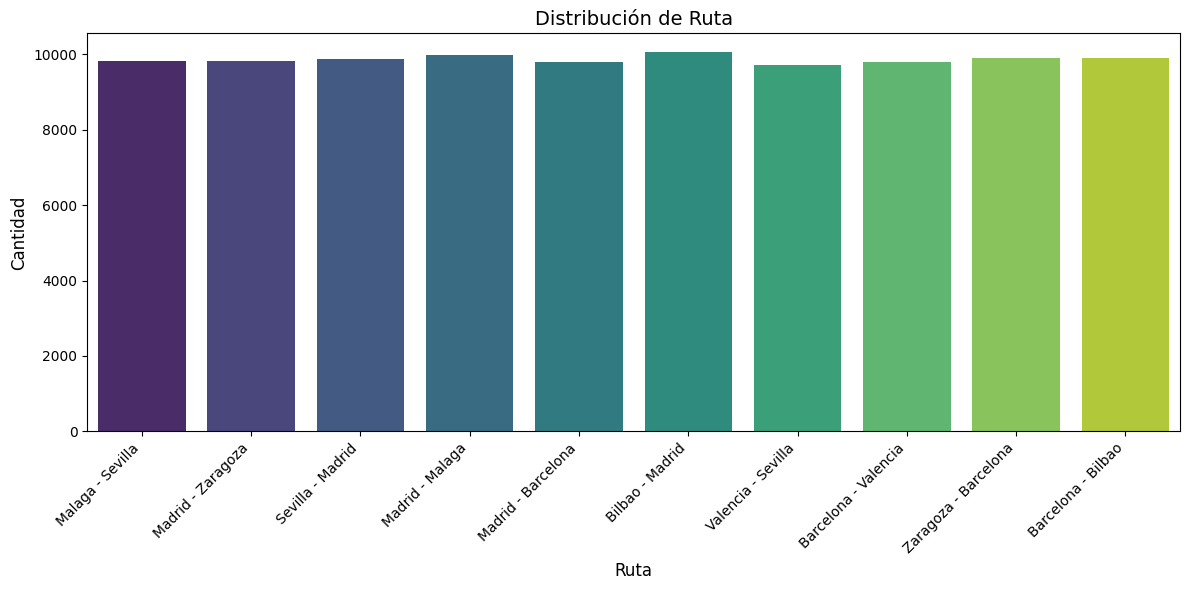

Estadísticas descriptivas de Ruta
count               98667
unique                 10
top       Bilbao - Madrid
freq                10057
Name: Ruta, dtype: object


In [9]:
col_cat = ['Ruta','Tipo_Transporte', 'Region', 'Dia_Semana']
col='Ruta'
plot_categorical_distribution(data, col, title=f'Distribución de {col}')    

**4.1.1 Conclusiones de la Gráfica de Distribución de Rutas**  
- Hay 10 rutas diferentes en los datos.
- La ruta más frecuente es "Bilbao - Madrid".
- Todas las rutas tienen una cantidad similar de viajes, con pequeñas diferencias entre ellas.
- La ruta con más viajes es "Bilbao - Madrid", con un poco más de 10,000 viajes.
- Otras rutas como "Malaga - Sevilla", "Madrid - Zaragoza", "Sevilla - Madrid", y "Madrid - Malaga" también tienen cantidades de viajes bastante altas, cerca de los 10,000 cada una.
- La distribución es bastante uniforme, lo que indica que ninguna ruta domina significativamente sobre las otras en términos de frecuencia.

En resumen, los datos muestran que hay 10 rutas diferentes, y todas tienen una cantidad similar de viajes. La ruta más popular es "Bilbao - Madrid", pero otras rutas como "Malaga - Sevilla", "Madrid - Zaragoza", y "Sevilla - Madrid" también son bastante comunes. La distribución es bastante uniforme, lo que indica que no hay una ruta que sea mucho más utilizada que las demás. Esto sugiere que el tráfico de pasajeros está bien distribuido entre estas rutas.

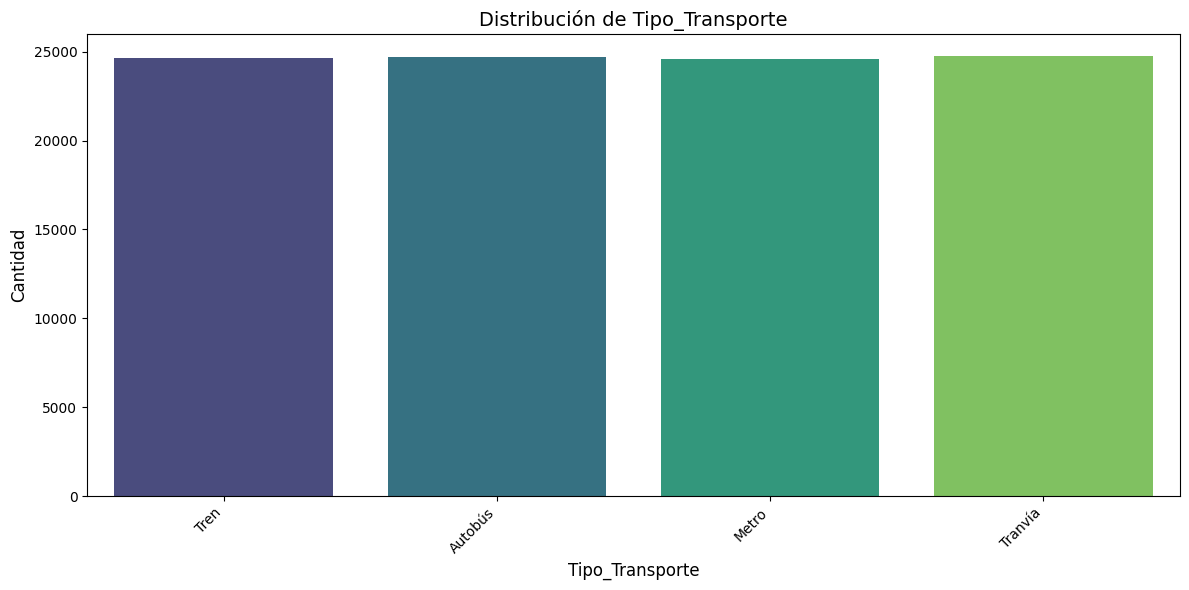

Estadísticas descriptivas de Tipo_Transporte
count       98667
unique          4
top       Tranvía
freq        24734
Name: Tipo_Transporte, dtype: object


In [10]:
col='Tipo_Transporte'
plot_categorical_distribution(data, col, title=f'Distribución de {col}')    

**4.1.2 Conclusiones de la Gráfica de Distribución de Tipo_Transporte**  
- Hay 4 tipos de transporte diferentes en los datos.
- El tipo de transporte más frecuente es "Tranvía".
- Todos los tipos de transporte tienen una cantidad similar de viajes, con pequeñas diferencias entre ellos.
- Otros tipos de transporte como "Tren", "Autobús", y "Metro" también tienen cantidades de viajes bastante altas, alrededor de 24,000 cada uno.
- La distribución es bastante uniforme, lo que indica que ningún tipo de transporte domina significativamente sobre los otros en términos de frecuencia.

En resumen, los datos muestran que hay 4 tipos diferentes de transporte, y todos tienen una cantidad similar de viajes. El tipo de transporte más popular es el "Tranvía", pero otros tipos como "Tren", "Autobús", y "Metro" también son bastante comunes. La distribución es bastante uniforme, lo que indica que no hay un tipo de transporte que sea mucho más utilizado que los demás. Esto sugiere que el tráfico de pasajeros está bien distribuido entre estos tipos de transporte.

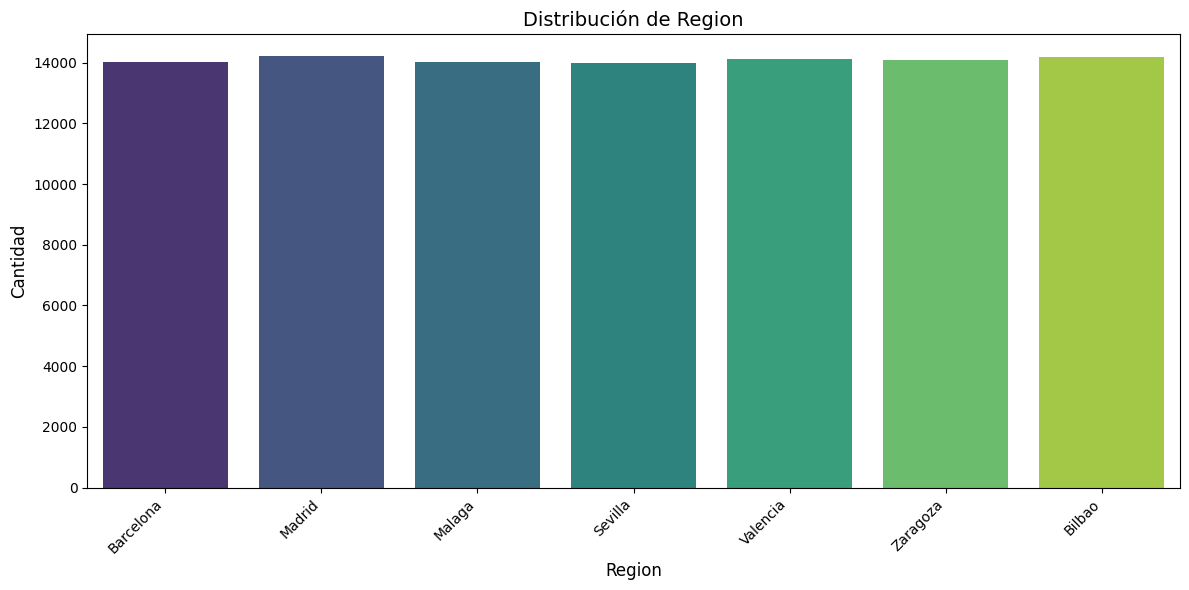

Estadísticas descriptivas de Region
count      98667
unique         7
top       Madrid
freq       14220
Name: Region, dtype: object


In [11]:
col='Region'
plot_categorical_distribution(data, col, title=f'Distribución de {col}')    

**4.1.3 Conclusiones de la Gráfica de Distribución de Región**  
- Hay 7 regiones diferentes en los datos.
- La región más frecuente es "Madrid".
- Todas las regiones tienen una cantidad similar de viajes, con pequeñas diferencias entre ellas.
- Otras regiones como "Barcelona", "Malaga", "Sevilla", "Valencia", "Zaragoza" y "Bilbao" también tienen cantidades de viajes bastante altas, cercanas a los 14,000 cada una.
- La distribución es bastante uniforme, lo que indica que ninguna región domina significativamente sobre las otras en términos de frecuencia.

En resumen, los datos muestran que hay 7 regiones diferentes, y todas tienen una cantidad similar de viajes. La región más popular es "Madrid", pero otras regiones como "Barcelona", "Malaga", "Sevilla", "Valencia", "Zaragoza" y "Bilbao" también son bastante comunes. La distribución es bastante uniforme, lo que indica que no hay una región que sea mucho más utilizada que las demás. Esto sugiere que el tráfico de pasajeros está bien distribuido entre estas regiones.

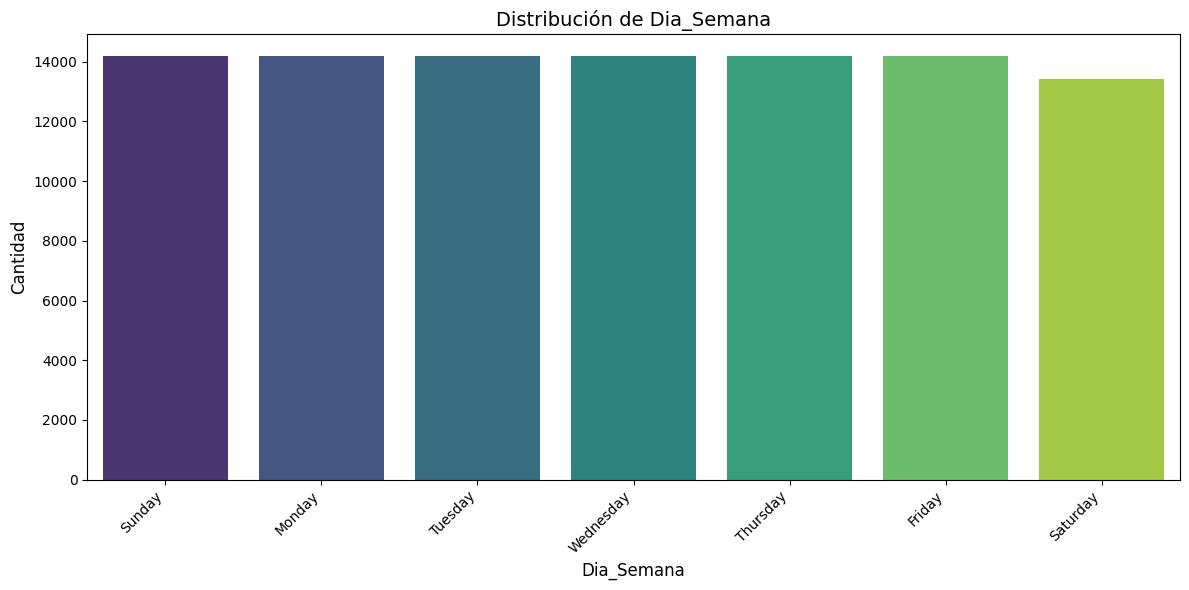

Estadísticas descriptivas de Dia_Semana
count      98667
unique         7
top       Sunday
freq       14208
Name: Dia_Semana, dtype: object


In [12]:
col='Dia_Semana'
plot_categorical_distribution(data, col, title=f'Distribución de {col}')    

**4.1.4 Conclusiones de la Gráfica de Distribución de Dia_Semana**  
- Hay 7 días de la semana en los datos.
- El día más frecuente es "Sunday" (Domingo).
- Todos los días de la semana tienen una cantidad similar de viajes, con pequeñas diferencias entre ellos.
- Otros días como "Monday" (Lunes), "Tuesday" (Martes), "Wednesday" (Miércoles), "Thursday" (Jueves), "Friday" (Viernes) y "Saturday" (Sábado) también tienen cantidades de viajes bastante altas, cercanas a los 14,000 cada uno.
- La distribución es bastante uniforme, lo que indica que ningún día de la semana domina significativamente sobre los otros en términos de frecuencia.

En resumen, los datos muestran que hay 7 días de la semana diferentes, y todos tienen una cantidad similar de viajes. El día más popular es "Sunday" (Domingo), pero otros días como "Monday" (Lunes), "Tuesday" (Martes), "Wednesday" (Miércoles), "Thursday" (Jueves), "Friday" (Viernes) y "Saturday" (Sábado) también son bastante comunes. La distribución es uniforme, lo que indica que no hay un día de la semana que sea mucho más utilizado que los demás. Esto sugiere que el tráfico de pasajeros está bien distribuido a lo largo de la semana.

**4.2: Variables continuas** Realizaremos ahora un análisis de la dispersión de las variables continuas.

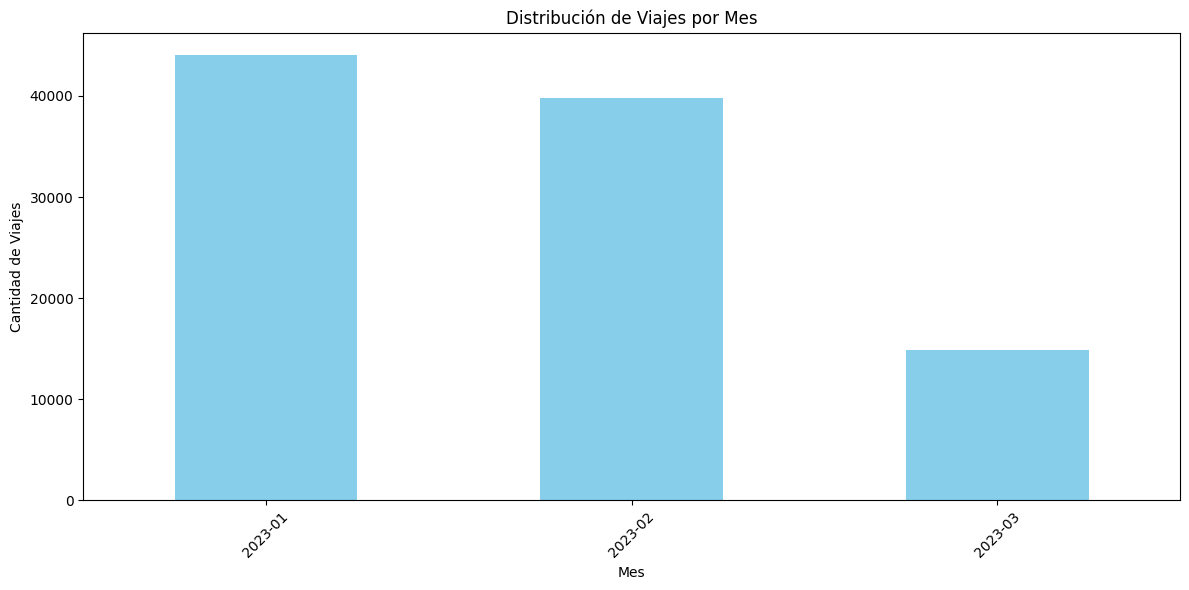

Estadísticas descriptivas de Viajes por Mes
count       98667
unique          3
top       2023-01
freq        44044
Name: Fecha, dtype: object


In [13]:
# Distribución de viajes por fecha agrupada por mes
# Agregar columna para el mes y el año
data['Mes'] = data['Fecha'].dt.to_period('M')

# Agrupar por mes y contar
viajes_por_mes = data.groupby('Mes').size()

# Visualización
plt.figure(figsize=(12, 6))
viajes_por_mes.plot(kind='bar', color='skyblue')
plt.title('Distribución de Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Estadísticas descriptivas de Viajes por Mes')
print( data['Fecha'].dt.to_period('M').describe())



**4.2.1 Conclusiones de la Gráfica de Distribución de Viajes por Mes**  
- Hay datos de 3 meses en los datos: Enero 2023, Febrero 2023, y Marzo 2023.
- El mes más frecuente es Enero 2023.
- La mayoría de los viajes se concentran en los primeros dos meses del año.
- Febrero 2023 también tiene una cantidad significativa de viajes, aunque un poco menos que Enero.
- Marzo 2023 tiene una cantidad notablemente menor de viajes en comparación con los otros dos meses.
- Esto sugiere que la actividad de viajes disminuye a medida que avanza el año, al menos en los primeros tres meses.

En resumen, los datos muestran que hay viajes registrados en tres meses: Enero, Febrero y Marzo de 2023. Enero es el mes con la mayor cantidad de viajes, seguido de cerca por Febrero. Marzo, sin embargo, tiene una cantidad considerablemente menor de viajes. Esto podría indicar una tendencia de disminución de viajes a medida que avanza el año, al menos en el primer trimestre observado.

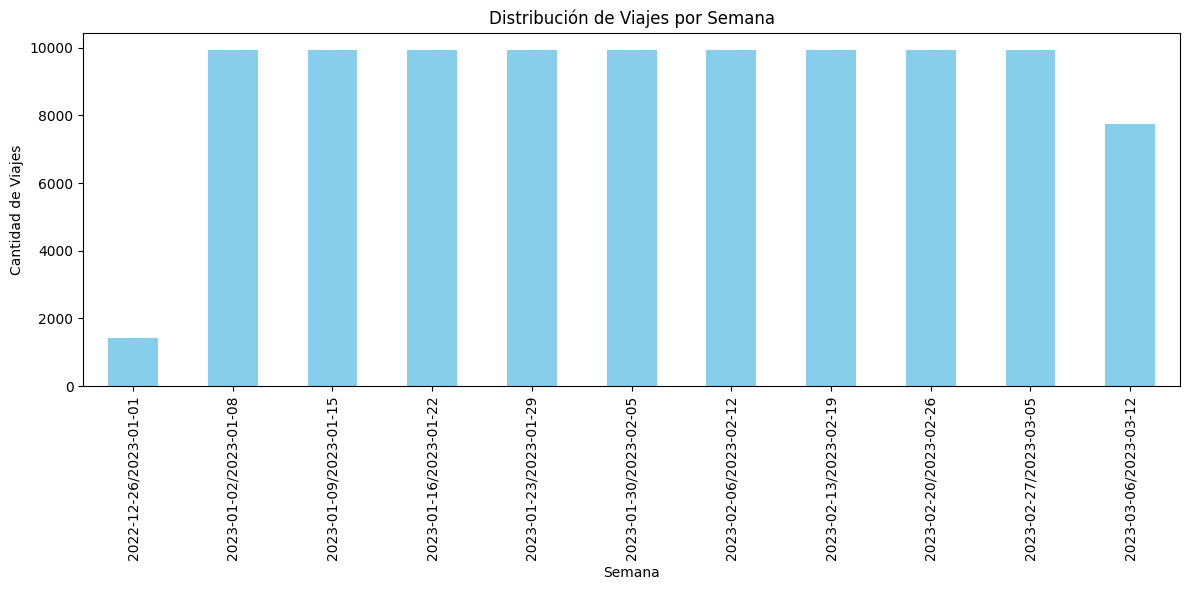



Estadísticas descriptivas de Viajes por Semana
count                     98667
unique                       11
top       2023-01-02/2023-01-08
freq                       9946
Name: Fecha, dtype: object


In [14]:
# Agregar columna para la semana del año
data['Semana'] = data['Fecha'].dt.to_period('W')

# Agrupar por semana y contar
viajes_por_semana = data.groupby('Semana').size()

# Visualización
plt.figure(figsize=(12, 6))
viajes_por_semana.plot(kind='bar', color='skyblue')
plt.title('Distribución de Viajes por Semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de Viajes')
plt.xticks(ha='center')
plt.tight_layout()
plt.show()
# Mostrar estadísticas descriptivas después del gráfico
print("\n")
print('Estadísticas descriptivas de Viajes por Semana')
print(data['Fecha'].dt.to_period('W').describe())

**4.2.2 Conclusiones de la Gráfica de Distribución de Viajes por Semana**  
- Hay 11 semanas diferentes en los datos.
- La mayoría de las semanas tienen un número de viajes bastante constante, alrededor de 9,000 a 10,000 viajes.
- La semana del 2022-12-26 al 2023-01-01 tiene significativamente menos viajes comparado con las otras semanas.
- La semana con más viajes es del 2023-01-02 al 2023-01-08.
- A partir de la semana del 2023-03-06 al 2023-03-12, hay una disminución notable en el número de viajes.


En resumen, los datos muestran que la mayoría de las semanas tienen un número constante de viajes, entre 9,000 y 10,000 viajes. La excepción notable es la semana que abarca el cambio de año, que tiene muchos menos viajes. La semana con más viajes fue justo después del Año Nuevo. A partir de la primera semana de marzo, parece haber una disminución notable en el número de viajes.



Estadísticas descriptivas de Viajes por hora
count    98667.000000
mean        11.457336
std          6.924760
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Fecha, dtype: float64


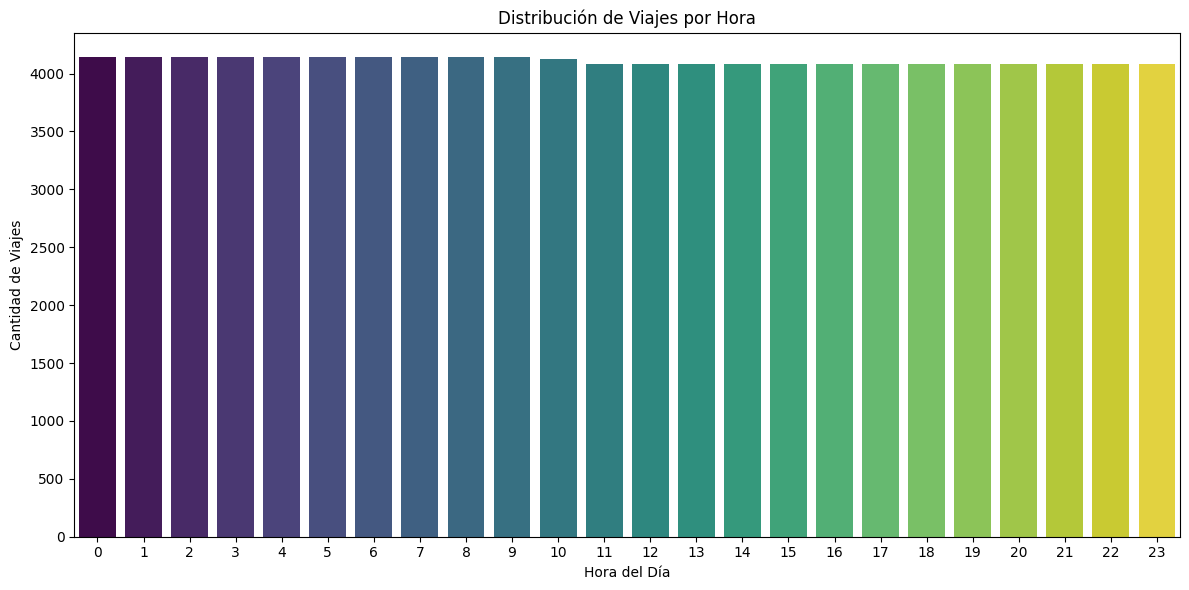

In [15]:
# Distribución de viajes por hora
data['Hora'] = data['Fecha'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hora', data=data, hue='Hora', dodge=False, palette='viridis', legend=False)
plt.title('Distribución de Viajes por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Viajes')
plt.tight_layout()
plt.show
# Mostrar estadísticas descriptivas después del gráfico
print("\n")
print('Estadísticas descriptivas de Viajes por hora')
print(data['Fecha'].dt.hour.describe())

**4.2.2 Conclusiones de la Gráfica de Distribución de Viajes por Hora**  
Esta gráfica nos muestra cómo se distribuyen los viajes a lo largo de las diferentes horas del día. Aquí van algunas observaciones clave:
- La cantidad de viajes parece bastante uniforme a lo largo de las 24 horas del día. Esto significa que no hay una hora específica en la que se realicen significativamente más o menos viajes.
- Cada barra representa una hora del día y todas están bastante alineadas, indicando que la distribución de viajes está bien repartida durante el día.
- El valor mínimo de viajes es 0 y el máximo es 23. Esto sugiere que hay horas en las que se registran muy pocos o ningún viaje y horas en las que la cantidad de viajes es mucho más alta.   **BEGO. INCOHERENTE CON LOS PUNTOS ANTERIORES, REVISAR REDACCIÓN**

En resumen, esta gráfica y las estadísticas asociadas nos dicen que los viajes están bastante bien distribuidos durante todas las horas del día, con una cantidad de viajes relativamente constante y sin fluctuaciones drásticas en ningún momento específico. Esto puede ser indicativo de un sistema de transporte que se utiliza de manera continua y consistente por los usuarios.

In [16]:
# Establecer estilo
sns.set_style("whitegrid")
sns.set_palette("pastel")

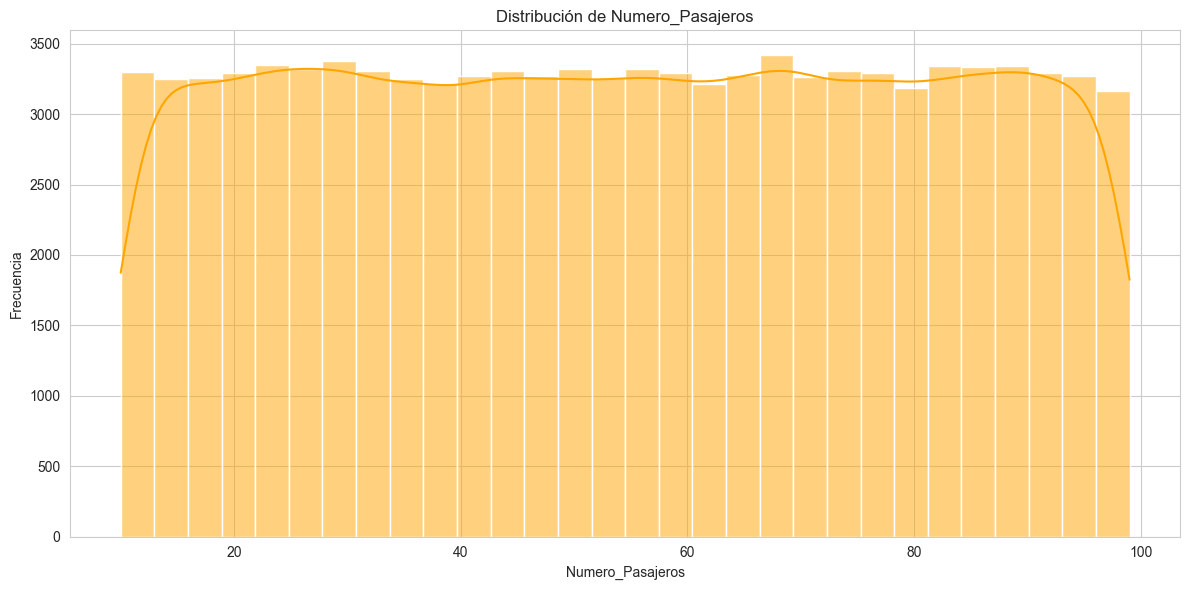

Estadísticas descriptivas de Numero_Pasajeros
count    98667.000000
mean        54.460559
std         25.954401
min         10.000000
25%         32.000000
50%         54.000000
75%         77.000000
max         99.000000
Name: Numero_Pasajeros, dtype: float64


In [17]:
plot_histogram(data, 'Numero_Pasajeros')

**4.2.3 Conclusiones de la Gráfica de Distribución de Número de pasajeros**  
- La mayoría de los viajes tienen entre 2500 y 3500 pasajeros, lo que significa que muchos viajes tienen una cantidad similar de pasajeros.
- La gráfica es bastante plana en el medio, lo que indica que no hay un número de pasajeros que ocurra mucho más frecuentemente que otros.
- Hay menos viajes en los extremos (cerca de 10 y 100 pasajeros), lo que sugiere que los viajes con estos números extremos de pasajeros son menos comunes.   **BEGO. MENOS VIAJES O MENOS PASAJEROS EN LOS EXTREMOS, REVISAR REDACCIÓN**

En resumen, la mayoría de los viajes tienen un número de pasajeros bastante uniforme, con un promedio de 54 pasajeros por viaje. No hay muchos viajes con el número mínimo o máximo de pasajeros, y la cantidad de pasajeros varía de manera constante en la mayoría de los viajes. La distribución es bastante plana, mostrando que no hay un número de pasajeros que sea mucho más común que otros, excepto en los extremos.

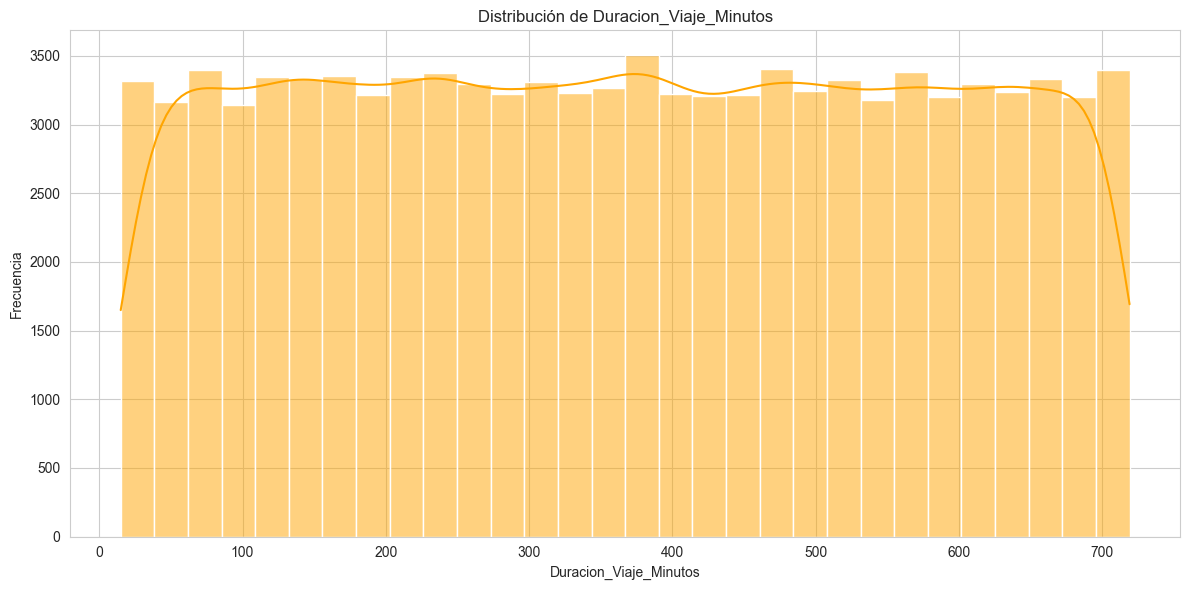

Estadísticas descriptivas de Duracion_Viaje_Minutos
count    98667.000000
mean       366.884247
std        203.275467
min         15.000000
25%        191.000000
50%        367.000000
75%        543.000000
max        719.000000
Name: Duracion_Viaje_Minutos, dtype: float64


In [18]:
plot_histogram(data, 'Duracion_Viaje_Minutos')

**4.2.4 Conclusiones de la Gráfica de Distribución de Duración Viaje Minutos**  
- La mayoría de los viajes tienen una duración de entre 2500 y 3500 minutos, lo que significa que muchos viajes tienen una duración similar.
- La gráfica es bastante plana en el medio, lo que indica que no hay una duración de viaje que ocurra mucho más frecuentemente que otras.
- Hay menos viajes en los extremos (cerca de 15 y 719 minutos), lo que sugiere que los viajes con estos tiempos extremos son menos comunes.   **BEGO. LO MISMO QUE EN EL CASO ANTERIOR, MENOS VIAJES O MENOS MINUTOS, REVISAR REDACCIÓN.**

En resumen, la mayoría de los viajes tienen una duración bastante uniforme, con un promedio de aproximadamente 367 minutos por viaje. No hay muchos viajes con la duración mínima o máxima, y la duración de los viajes varía de manera constante en la mayoría de los viajes. La distribución es bastante plana, mostrando que no hay una duración de viaje que sea mucho más común que otras, excepto en los extremos.

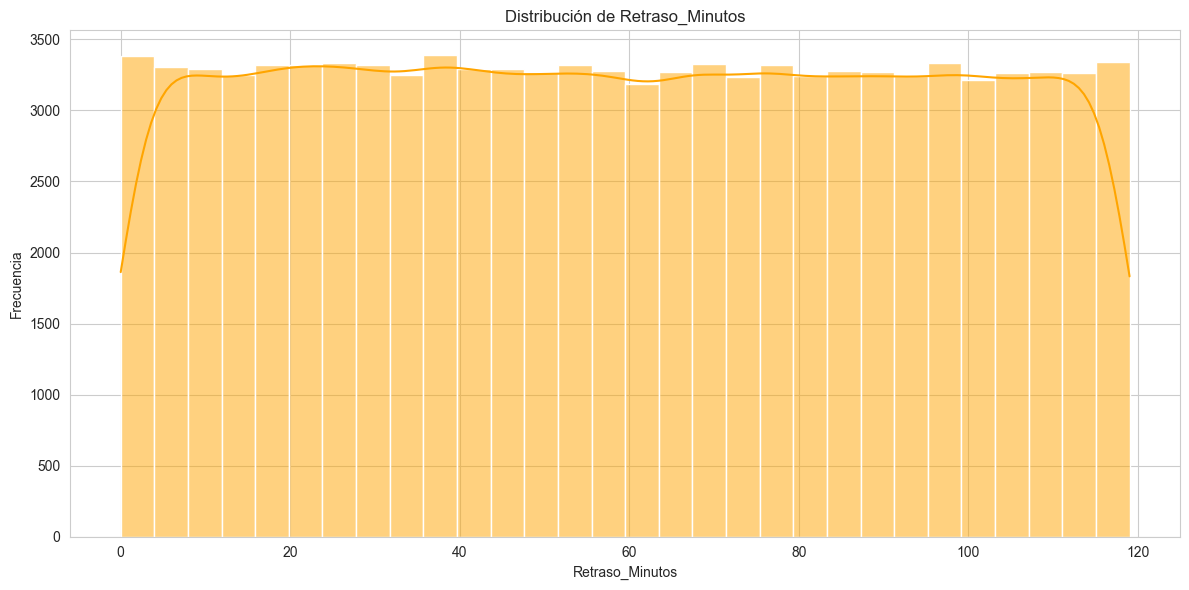

Estadísticas descriptivas de Retraso_Minutos
count    98667.000000
mean        59.328945
std         34.688975
min          0.000000
25%         29.000000
50%         59.000000
75%         89.000000
max        119.000000
Name: Retraso_Minutos, dtype: float64


In [19]:
plot_histogram(data, 'Retraso_Minutos')

**4.2.5 Conclusiones de la Gráfica de Distribución de Retrasos**  
**Retrasos Constantes:**
- La mayoría de los viajes tienen entre 2500 y 3500 minutos de retraso, lo que significa que muchos viajes tienen una cantidad similar de retraso.
- La gráfica es bastante plana en el medio, lo que indica que no hay una cantidad de retraso que ocurra mucho más frecuentemente que otras.
- Hay menos viajes en los extremos (cerca de 0 y 120 minutos), lo que sugiere que los viajes con estos tiempos extremos de retraso son menos comunes.   **BEGO, LO MISMO QUE EN LOS DOS ANTERIORES**

En resumen, la mayoría de los viajes tienen un retraso bastante uniforme, con un promedio de aproximadamente 59 minutos por viaje. No hay muchos viajes con el mínimo o máximo de retraso, y la cantidad de retraso varía de manera constante en la mayoría de los viajes. La distribución es bastante plana, mostrando que no hay una cantidad de retraso que sea mucho más común que otras, excepto en los extremos.

4.3 Análisis Bivariado.

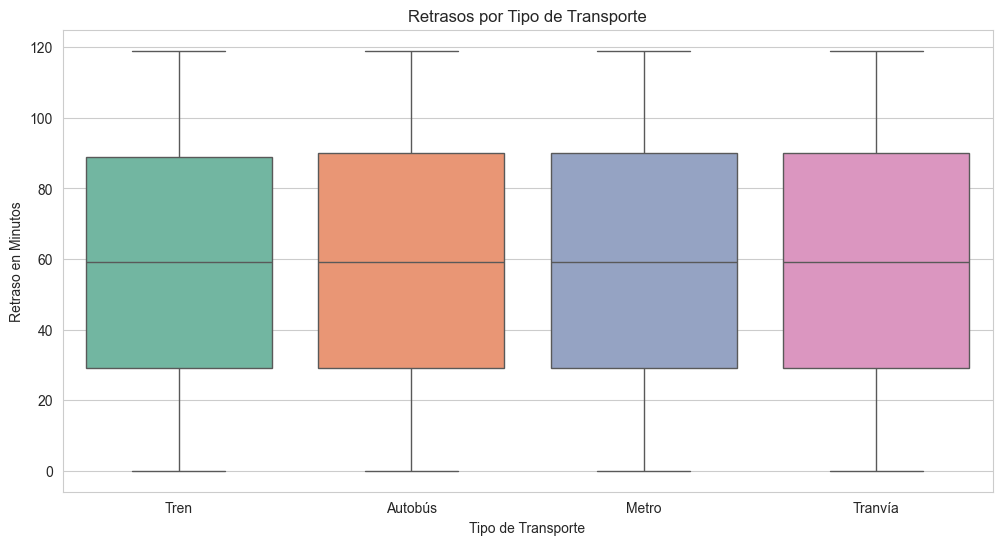

,count,mean,std,min,25%,50%,75%,max
Tipo_Transporte,,,,,,,,
Autobús,24680.0,59.386305,34.913191,0.0,29.0,59.0,90.0,119.0
Metro,24600.0,59.380732,34.674382,0.0,29.0,59.0,90.0,119.0
Tranvía,24734.0,59.451848,34.704808,0.0,29.0,59.0,90.0,119.0
Tren,24653.0,59.096540,34.462746,0.0,29.0,59.0,89.0,119.0


In [20]:
# Retrasos por Tipo de Transporte
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', data=data, hue='Tipo_Transporte', palette="Set2", dodge=False)
plt.title('Retrasos por Tipo de Transporte')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()
# Estadísiticas descriptivas
transporte_stats = data.groupby('Tipo_Transporte')['Retraso_Minutos'].describe()
transporte_stats

**4.3.1 Conclusiones de la Gráfica de Retrasos por Medio de transporte**  
A partir de esta gráfica y las estadísticas descriptivas, podemos concluir que no hay una diferencia significativa en los retrasos promedio entre los diferentes tipos de transporte. Todos los medios de transporte tienen retrasos que oscilan en un rango similar, con medianas y distribuciones bastante uniformes. Esto sugiere que el tipo de transporte por sí solo no es un factor determinante para los retrasos en esta muestra de datos.

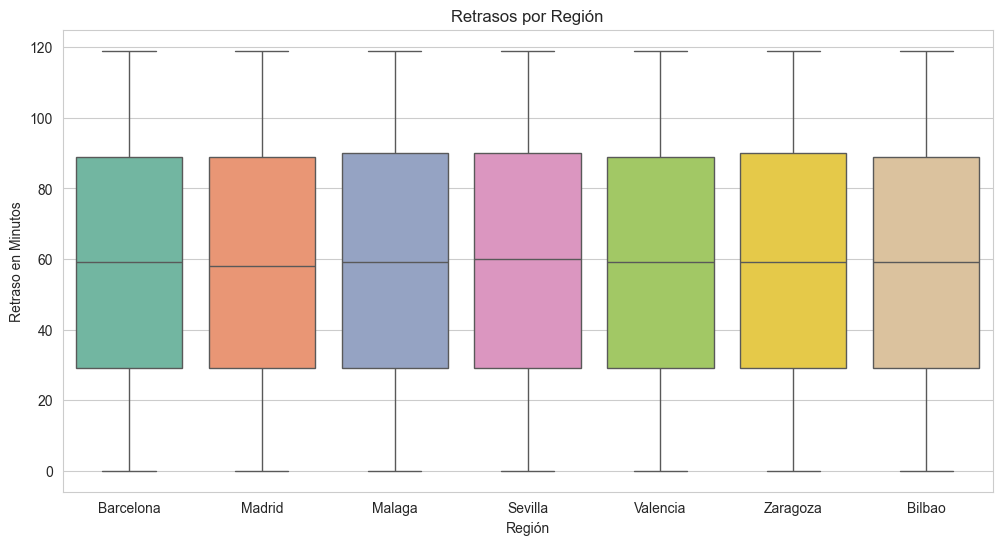

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Barcelona,14031.0,59.551137,34.725615,0.0,29.0,59.0,89.0,119.0
Bilbao,14195.0,59.306657,34.726062,0.0,29.0,59.0,89.0,119.0
Madrid,14220.0,58.987412,34.758826,0.0,29.0,58.0,89.0,119.0
Malaga,14020.0,59.458274,34.794683,0.0,29.0,59.0,90.0,119.0
Sevilla,14003.0,59.403556,34.474995,0.0,29.0,60.0,90.0,119.0
Valencia,14106.0,59.246136,34.528504,0.0,29.0,59.0,89.0,119.0
Zaragoza,14092.0,59.354882,34.815752,0.0,29.0,59.0,90.0,119.0


In [21]:
# Retrasos por Región
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Retraso_Minutos', data=data, hue='Region', palette="Set2", dodge=False)
plt.title('Retrasos por Región')
plt.xlabel('Región')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()
# Estadísiticas descriptivas
transporte_stats = data.groupby('Region')['Retraso_Minutos'].describe()
transporte_stats


**4.3.2 Conclusiones de la Gráfica de Retrasos por Región**  
A partir de esta gráfica y las estadísticas descriptivas, podemos concluir que no hay una diferencia significativa en los retrasos promedio entre las diferentes regiones. Todas las regiones tienen retrasos que oscilan en un rango similar, con medianas y distribuciones bastante uniformes. Esto sugiere que la región por sí sola no es un factor determinante para los retrasos en esta muestra de datos.

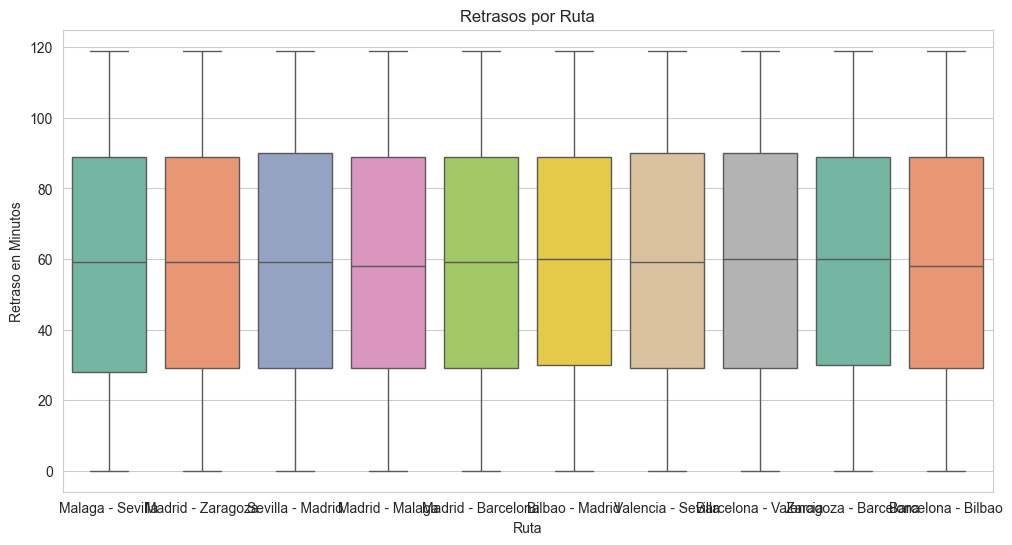

,count,mean,std,min,25%,50%,75%,max
Ruta,,,,,,,,
Barcelona - Bilbao,9896.0,58.999394,34.564175,0.0,29.0,58.0,89.0,119.0
Barcelona - Valencia,9791.0,59.666530,34.886696,0.0,29.0,60.0,90.0,119.0
Bilbao - Madrid,10057.0,59.516257,34.593143,0.0,30.0,60.0,89.0,119.0
Madrid - Barcelona,9807.0,59.195371,34.549299,0.0,29.0,59.0,89.0,119.0
Madrid - Malaga,9983.0,58.781729,34.630484,0.0,29.0,58.0,89.0,119.0
Madrid - Zaragoza,9832.0,59.322010,34.677292,0.0,29.0,59.0,89.0,119.0
Malaga - Sevilla,9820.0,59.013035,34.827289,0.0,28.0,59.0,89.0,119.0
Sevilla - Madrid,9868.0,59.425213,34.711695,0.0,29.0,59.0,90.0,119.0
Valencia - Sevilla,9708.0,59.566234,35.004779,0.0,29.0,59.0,90.0,119.0


In [22]:
# Retrasos por Ruta
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ruta', y='Retraso_Minutos', data=data, hue='Ruta', palette="Set2", dodge=False)
plt.title('Retrasos por Ruta')
plt.xlabel('Ruta')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()
# Estadísiticas descriptivas
transporte_stats = data.groupby('Ruta')['Retraso_Minutos'].describe()
transporte_stats

**4.3.3 Conclusiones de la Gráfica de Retrasos por Ruta**  
Al igual que con las regiones, las rutas no parecen influir significativamente en los retrasos. Las distribuciones de los retrasos son muy similares en todas las rutas, con medianas alrededor de los 59 minutos y rangos intercuartiles que cubren los mismos valores. Esto indica que la ruta específica no es un factor determinante para los retrasos en esta muestra de datos.

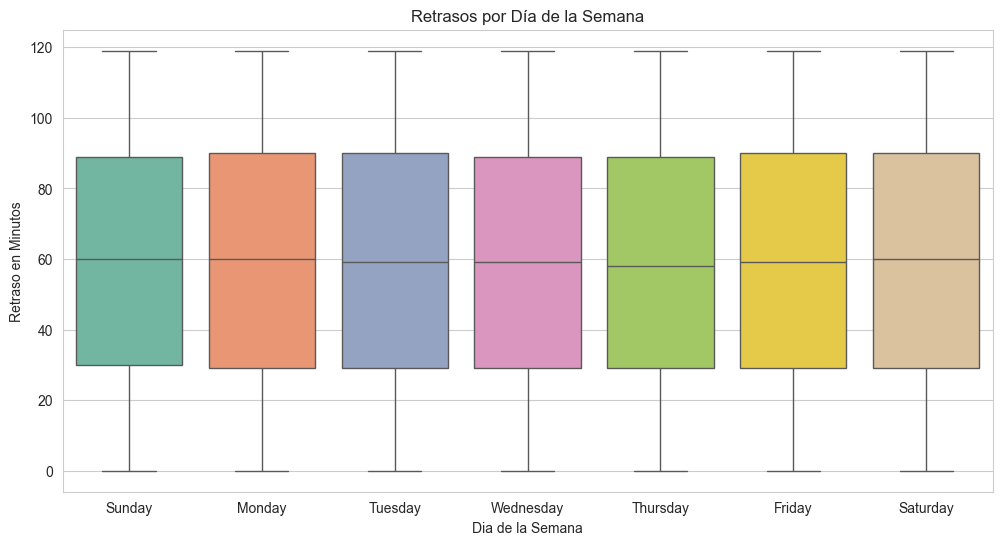

,count,mean,std,min,25%,50%,75%,max
Dia_Semana,,,,,,,,
Friday,14208.0,59.271819,34.837967,0.0,29.0,59.0,90.0,119.0
Monday,14208.0,59.621199,34.740980,0.0,29.0,60.0,90.0,119.0
Saturday,13419.0,59.611595,34.685811,0.0,29.0,60.0,90.0,119.0
Sunday,14208.0,59.686655,34.352865,0.0,30.0,60.0,89.0,119.0
Thursday,14208.0,58.921101,34.830633,0.0,29.0,58.0,89.0,119.0
Tuesday,14208.0,59.084600,34.713537,0.0,29.0,59.0,90.0,119.0
Wednesday,14208.0,59.121340,34.657788,0.0,29.0,59.0,89.0,119.0


In [23]:
# Retrasos por Día de la Semana
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dia_Semana', y='Retraso_Minutos', data=data, hue='Dia_Semana', palette="Set2", dodge=False)
plt.title('Retrasos por Día de la Semana')
plt.xlabel('Dia de la Semana')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()
# Estadísiticas descriptivas
transporte_stats = data.groupby('Dia_Semana')['Retraso_Minutos'].describe()
transporte_stats

**4.3.4 Conclusiones de la Gráfica de Retrasos por Día de la Semana**  
Al igual que con las regiones y las rutas, los días de la semana no parecen influir significativamente en los retrasos. Las distribuciones de los retrasos son muy similares en todos los días de la semana, con medianas alrededor de los 59 minutos y rangos intercuartiles que cubren los mismos valores. Esto indica que el día de la semana específico no es un factor determinante para los retrasos en esta muestra de datos.

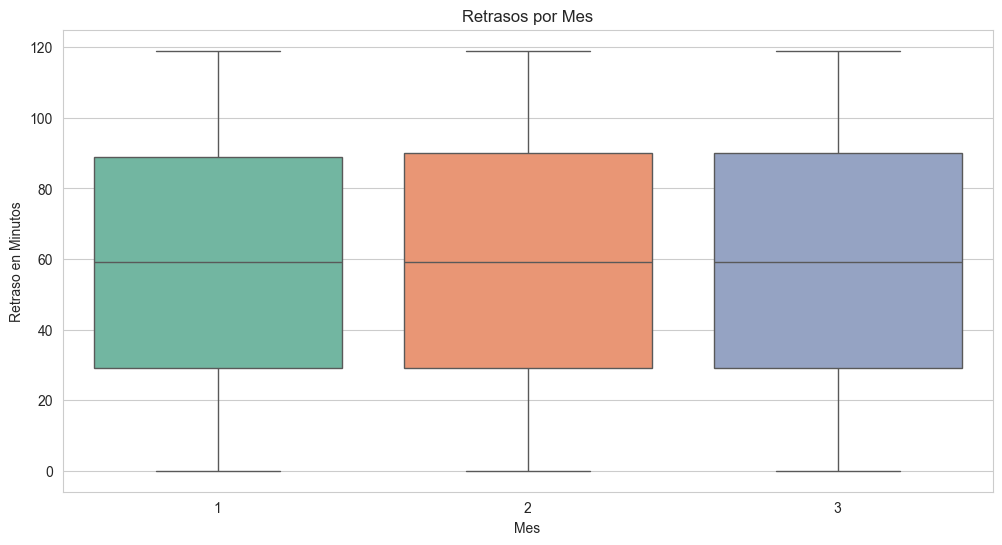

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,44044.0,59.163927,34.656584,0.0,29.0,59.0,89.0,119.0
2,39783.0,59.473142,34.709458,0.0,29.0,59.0,90.0,119.0
3,14840.0,59.432143,34.730326,0.0,29.0,59.0,90.0,119.0


Correlación entre duración del Mes y retrasos: 0.003602948298882503


In [24]:
# Retrasos por Día de la Mes
data['Mes'] = data['Fecha'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Retraso_Minutos', data=data, hue='Mes', palette="Set2", dodge=False)
plt.title('Retrasos por Mes')
plt.xlabel('Mes')
plt.ylabel('Retraso en Minutos')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()
# Estadísiticas descriptivas
transporte_stats = data.groupby('Mes')['Retraso_Minutos'].describe()
display(transporte_stats)
# Correlación entre duración del viaje y retrasos
duracion_corr = data['Mes'].corr(data['Retraso_Minutos'])
print(f'Correlación entre duración del Mes y retrasos: {duracion_corr}')


**4.3.5 Conclusiones de la Gráfica de Retrasos por Mes**  
Al igual que con las demás categorías, los meses del año no parecen influir significativamente en los retrasos. Las distribuciones de los retrasos son muy similares en todos los meses, con medianas alrededor de los 59 minutos y rangos intercuartiles que cubren los mismos valores. Esto indica que el mes específico no es un factor determinante para los retrasos en esta muestra de datos.
Además la correlación entre la duración del mes y los retrasos es muy baja, con un valor de 0.000362942989882583, lo que indica que no hay una relación significativa entre el mes y los minutos de retraso.

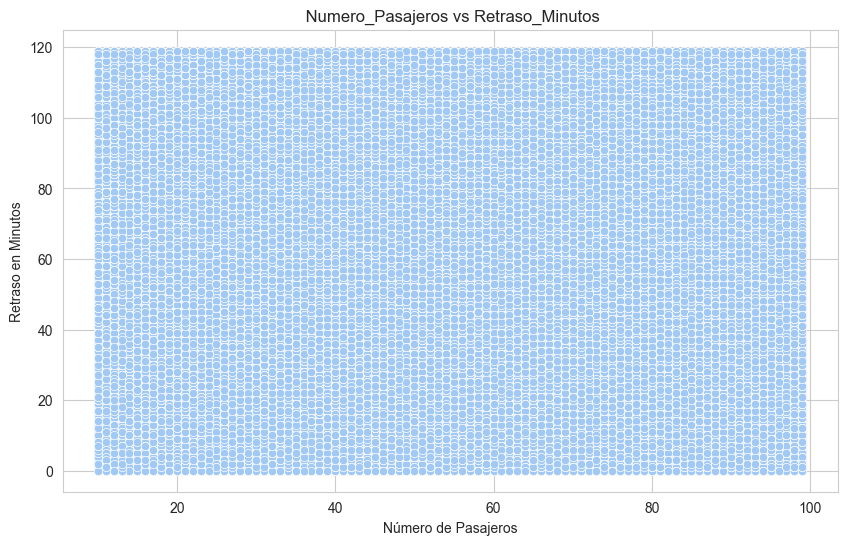

Correlación entre número de pasajeros y retrasos: 0.002179550672645141


In [25]:
# Gráfico de dispersión de número de pasajeros vs retrasos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Numero_Pasajeros', y='Retraso_Minutos', data=data)
plt.title(' Numero_Pasajeros vs Retraso_Minutos')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Retraso en Minutos')
plt.show()
# Correlación entre número de pasajeros y retrasos
pasajeros_corr = data['Numero_Pasajeros'].corr(data['Retraso_Minutos'])
print(f'Correlación entre número de pasajeros y retrasos: {pasajeros_corr}')


**4.3.6 Conclusión de la gráfica de dispersión Numero_Pasajeros vs Retraso_Minutos**  
El análisis de correlación y la gráfica de dispersión muestran que no hay una relación significativa entre el número de pasajeros y los retrasos en los viajes. Los retrasos parecen ser independientes del número de pasajeros, ya que la correlación es extremadamente baja. Esto sugiere que otros factores, y no el número de pasajeros, son los que probablemente influyen en los retrasos.

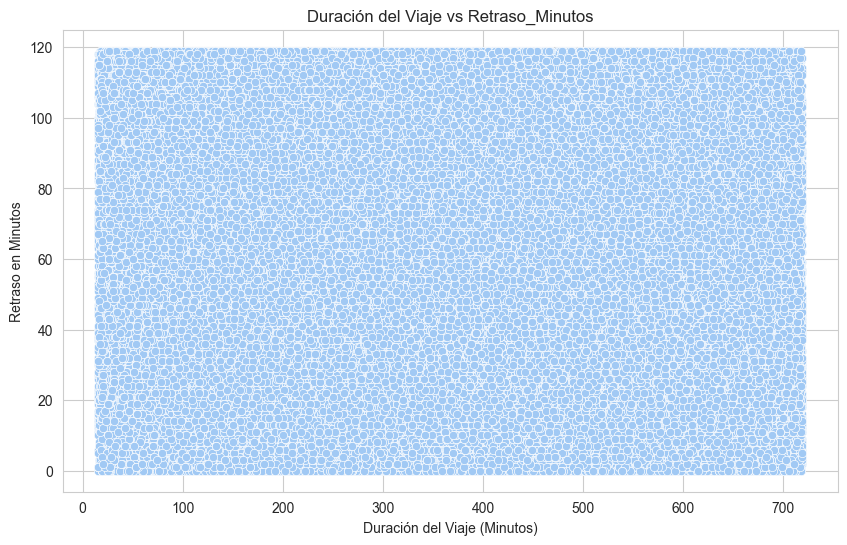

Correlación entre duración del viaje y retrasos: 0.003307785803024237


In [26]:
# Gráfico de dispersión de duración del viaje vs retrasos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duracion_Viaje_Minutos', y='Retraso_Minutos', data=data)
plt.title('Duración del Viaje vs Retraso_Minutos')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Retraso en Minutos')
plt.show()

# Correlación entre duración del viaje y retrasos
duracion_corr = data['Duracion_Viaje_Minutos'].corr(data['Retraso_Minutos'])
print(f'Correlación entre duración del viaje y retrasos: {duracion_corr}')


**4.3.7 Conclusión de la gráfica de dispersión Duracion_Viaje_Minutos vs Retraso_Minutos**  
El análisis de correlación y la gráfica de dispersión muestran que no hay una relación significativa entre la duración del viaje y los retrasos en los viajes. Los retrasos parecen ser independientes de la duración del viaje, ya que la correlación es extremadamente baja. Esto sugiere que otros factores, y no la duración del viaje, son los que probablemente influyen en los retrasos.

**4.4 Análisis Multivariado**

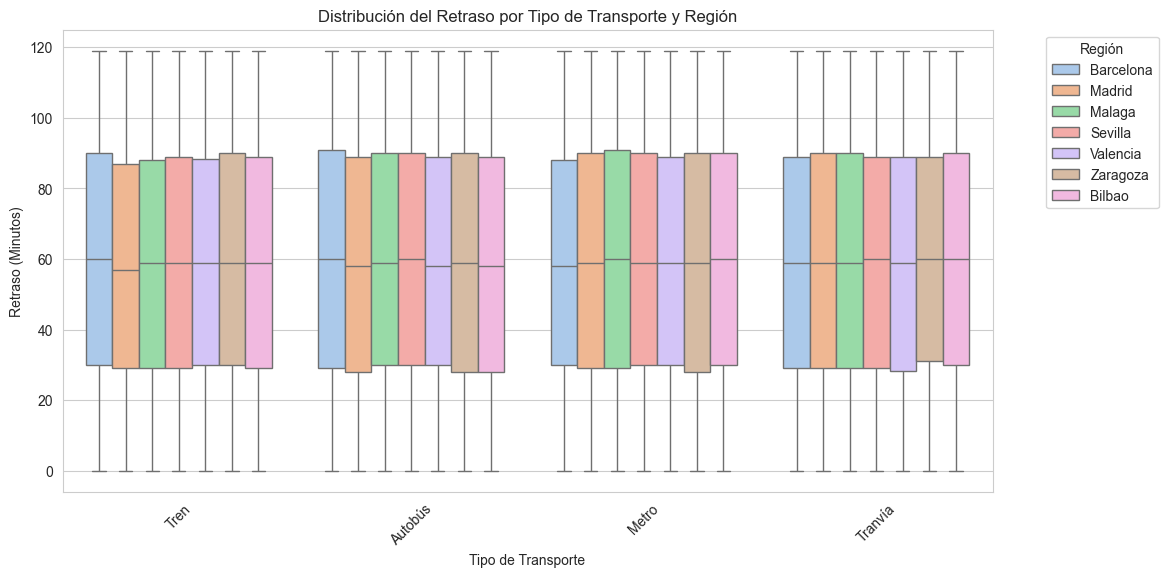

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', hue='Region', data=data)
plt.title('Distribución del Retraso por Tipo de Transporte y Región')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso (Minutos)')
plt.xticks(rotation=45)
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

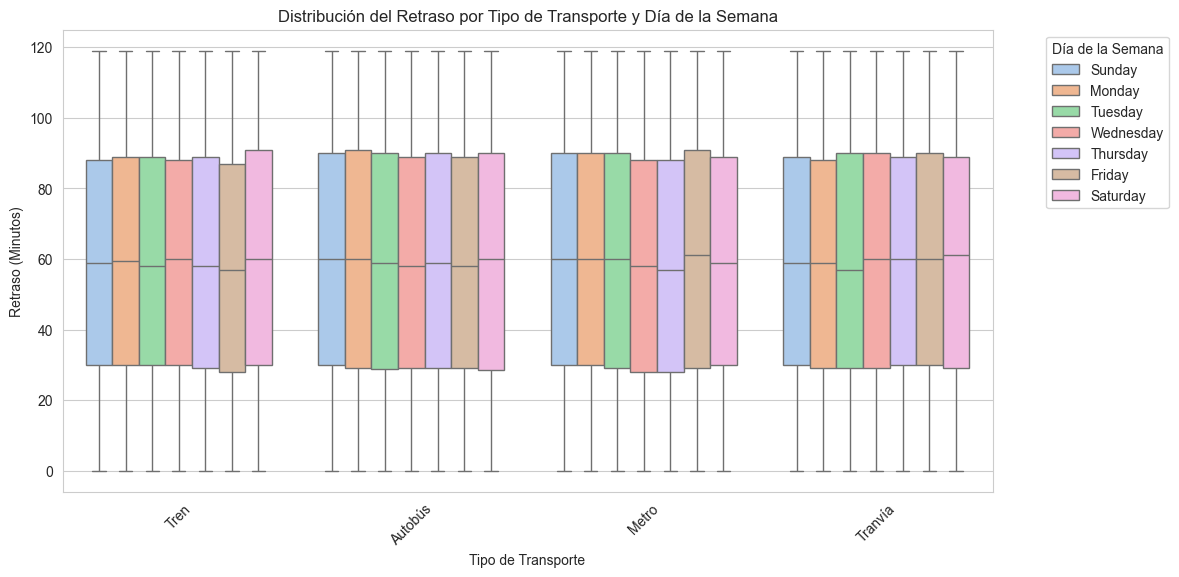

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', hue='Dia_Semana', data=data)
plt.title('Distribución del Retraso por Tipo de Transporte y Día de la Semana')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso (Minutos)')
plt.xticks(rotation=45)
plt.legend(title='Día de la Semana', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

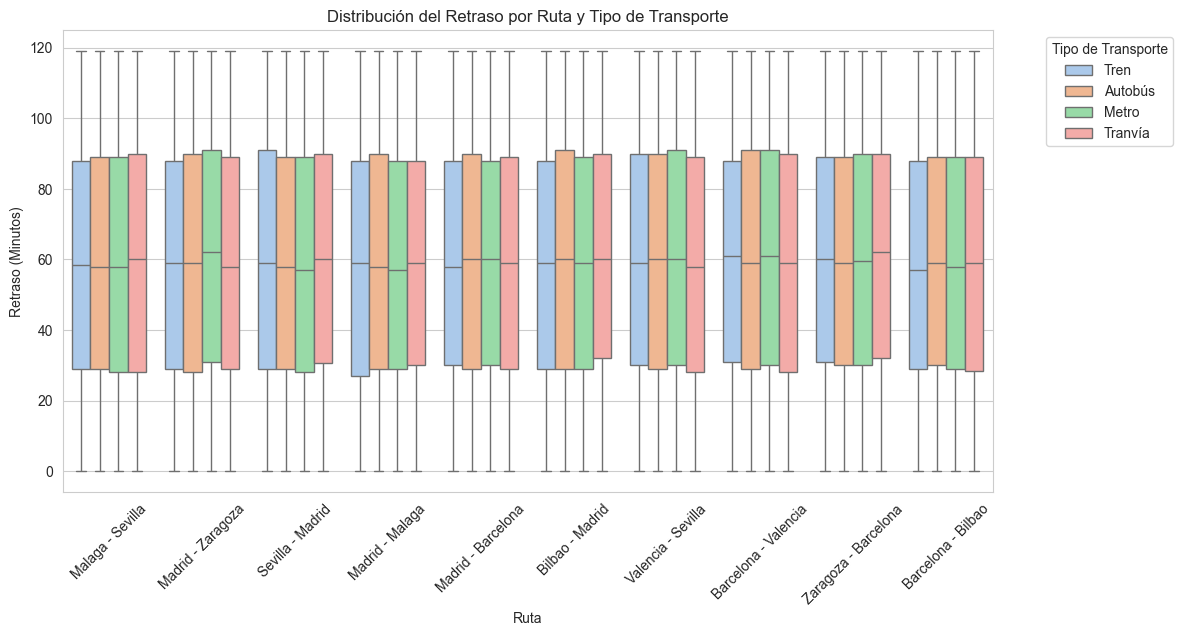

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ruta', y='Retraso_Minutos', hue='Tipo_Transporte', data=data)
plt.title('Distribución del Retraso por Ruta y Tipo de Transporte')
plt.xlabel('Ruta')
plt.ylabel('Retraso (Minutos)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**4.4.1 Conclusión del análisis multivariado**
El análisis de interacción realizado no revela una relación fuerte entre los retrasos y las variables categóricas como tipo de transporte, día de la semana, región o ruta. Esto sugiere que los retrasos pueden estar más influenciados por otros factores no considerados en este análisis, como problemas operativos, condiciones climáticas, o factores específicos de cada viaje.

**5. Conclusión final del análisis realizado**
Tras todos los análisis realizados, los retrasos en los viajes parecen ser consistentes y no están significativamente influenciados por las variables categóricas analizadas (tipo de transporte, región, día de la semana y ruta) ni por las variables continuas (número de pasajeros y duración del viaje). Esto sugiere que los retrasos pueden estar determinados por factores no capturados en este análisis, como eventos operativos específicos, condiciones externas no registradas en los datos (clima, tráfico, incidentes técnicos), o incluso variaciones aleatorias.

Para reducir los retrasos y mejorar la puntualidad, se recomendaría investigar más a fondo otros posibles factores, quizás mediante estudios de campo, encuestas a los operadores de transporte o el análisis de datos operativos específicos no incluidos en este conjunto de datos.

También podría realizarse un estudio a través de modelos predictivos: 

- Regresión Lineal: Para una relación lineal entre las variables y el retraso.
- Árboles de Decisión y Random Forest: Para capturar relaciones no lineales e interacciones entre las características.
- Otros.


**6. Diseñar una Base de Datos en SQL e Insertar los Datos usando Python**  
**6.1 Diseño**  
He decidido realizar el diseño utilizando un modelo en Estrella, ya que me parece el más óptimo para trabajar posteriormente con Power BI.  
El modelo en estrella consta de una tabla de hechos central y varias tablas de dimensiones conectadas a esta.  
Las tablas de hechos contienen los datos transaccionales o de eventos que se quieren analizar, mientras que las tablas de dimensiones contienen datos descriptivos que proporcionan contexto a los hechos.

**6.2 Tablas de la Base de Datos**
**Tabla de Hechos (hechos_transporte):**

Esta tabla contiene los datos principales que se quieren analizar.  
**Columnas:**  
- id_ruta
- id_transporte
- id_region
- id_dia
- numero_pasajeros
- duracion_viaje_minutos
- retraso_minutos  

**Tablas de Dimensiones:** 

**Dimensión Ruta (dim_ruta):** 
Describe las diferentes rutas de transporte.  
**Columnas:**   
- id
- ruta
  
**Dimensión Transporte (dim_transporte):**  
Describe los diferentes tipos de transporte.  
**Columnas:**
- id
- tipo_transporte
  
**Dimensión Región (dim_region):**  
Describe las diferentes regiones.  
**Columnas:** 
- id
- region  

**Dimensión Día (dim_dia):**  
Describe los días de la semana.  
**Columnas:**  
- id
- dia_semana
- 
Diseño de la Base de Datos en Estrella
A continuación, se presenta el archivo SQL que crea las tablas necesarias para este diseño en la carpeta SQL del repositorio.

**6.3 Ventajas del Diseño en Estrella**  
- **Simplicidad:** El diseño es sencillo y fácil de entender, lo que facilita su uso por parte de herramientas de BI como Power BI.
- **Rendimiento:** La estructura en estrella suele ofrecer un buen rendimiento en consultas analíticas, ya que las uniones entre la tabla de hechos y las tablas de dimensiones son directas.
- **Escalabilidad:** Es fácil añadir nuevas dimensiones o hechos a medida que los requisitos de análisis crecen.  

**6.4 Desventajas del Diseño en Estrella**
- **Redundancia:** Puede haber redundancia de datos en las tablas de dimensiones, ya que la misma información descriptiva puede aparecer en múltiples filas de la tabla de hechos.
- **Mantenimiento:** A medida que el modelo crece, el mantenimiento de las tablas y las relaciones puede volverse más complejo.

**7 Crear un Dashboard que incluya las principales conclusiones extraídas del análisis utilizando Power BI.**  
Se proporciona en este repositorio un fichero pbix dentro de la carpeta PWBI.

**8. Entorno**   
Se ha exportado el entorno en un fichero requeriments.txt en el directorio raiz de este Repositorio.  
Con el comando : **!pip freeze > requirements.txt**
Al tener el archivo `requirements.txt`, puedes recrear el mismo entorno en otro sistema usando el comando:

pip install -r requirements.txt

Se facilita también una carpeta Docker, que contiene los ficheros necesarios para la creación de un servidor local de BBDD opcional en caso de querer utilizarlo:  
**Paso 1: Construir y Ejecutar los Servicios con Docker Compose**  
Para construir y ejecutar los servicios definidos en docker-compose.yml, abre una terminal y navega al directorio que contiene docker-compose.yml y Dockerfile.dockerfile.  
Ejecuta el siguiente comando para construir y ejecutar los contenedores:  

docker-compose up --build  


**Paso 2: Verificar que los Servicios Están Corriendo**  
Utiliza el siguiente comando para listar los contenedores corriendo:

docker ps  

**Paso 3: Detener y Eliminar los Contenedores**  
Para detener y eliminar los contenedores creados por Docker Compose:  

docker-compose down


### Referencias Utilizadas

Para la realización y documentación del análisis y visualización de datos en Power BI, se han utilizado las siguientes referencias:

1. **ChatGPT 4**:
   - Utilizado para generar contenido detallado y guías paso a paso sobre cómo crear visualizaciones y trabajar con datos en Power BI y Python.
   - Realización de pruebas sin tener que montar entornos.

2. **Codificando Bits**:
   - Canal de YouTube especializado en programación y análisis de datos. Ofrece tutoriales detallados sobre diversos temas de ciencia de datos y visualización, incluyendo Power BI.
   - [Codificando Bits](https://www.youtube.com/@codificandobits)

3. **Exploratory Data Analysis in Pandas | Python Pandas Tutorials - YouTube**:
   - Un tutorial en video que explica cómo realizar un análisis exploratorio de datos (EDA) utilizando Pandas en Python. Proporciona ejemplos prácticos de cómo limpiar y visualizar datos.
   - [Ver Video](https://www.youtube.com/watch?v=Liv6eeb1VfE)

4. **Exploratory Data Analysis with Pandas Python - YouTube**:
   - Este video se enfoca en cómo realizar un EDA usando Pandas en Python, presentado por un experto en ciencia de datos. Ideal para entender los conceptos básicos y avanzados de EDA.
   - [Ver Video](https://www.youtube.com/watch?v=xi0vhXFPegw)

5. **Exploratory data Analysis using Python | Introduction : EDA | House Price Prediction - YouTube**:
   - Un tutorial sobre cómo realizar EDA usando Python con un enfoque en la predicción de precios de viviendas. Este video es útil para ver la aplicación práctica de EDA en un proyecto real.
   - [Ver Video](https://www.youtube.com/watch?v=SM95HJ1CCdM)

6. **Exploratory Data Analysis (EDA) Using Python | Python Data Analysis | Python Training | Edureka - YouTube**:
   - Un video educativo que enseña cómo llevar a cabo EDA usando Python, cubriendo desde la limpieza de datos hasta la visualización avanzada, todo con ejemplos prácticos.
   - [Ver Video](https://www.youtube.com/watch?v=-o3AxdVcUtQ)

7. **OpenWebinars**:
   - Plataforma educativa que ofrece cursos y webinars sobre análisis de datos, programación y tecnologías de la información. Proporciona recursos valiosos para el aprendizaje y la aplicación de EDA y visualización de datos en Power BI.
   - [OpenWebinars](https://openwebinars.net/)

Estas referencias proporcionan una base sólida para entender y aplicar técnicas de análisis de datos exploratorio y visualización en Power BI y Python, facilitando la creación de informes y gráficos complejos de manera eficiente.